In [1]:
# librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# leer el data set
df0 = pd.read_csv('customer_shopping_data.csv')
df0.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul


In [38]:
df0['invoice_no'].nunique()

99457

In [39]:
df0['customer_id'].nunique()

99457

In [37]:
# forma del df
print(df0.shape)

(99457, 10)


In [4]:
# informacion general del df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [40]:
# valores unicos del atributo
print("Valores unicos en payment_method:",df0['payment_method'].unique())

# numero de valores diferentes del atributo
print("numero de valores unicos:", df0['payment_method'].nunique())

Valores unicos en payment_method: ['Credit Card' 'Debit Card' 'Cash']
numero de valores unicos: 3


In [6]:
# valores unicos del atributo
print("Valores unicos en gender:",df0['gender'].unique())

Valores unicos en gender: ['Female' 'Male']


In [7]:
# Copia del df antes de modificar los datos
df1 = df0.copy()

In [8]:
# convertir el 'invoice_date' en fecha
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], dayfirst=True )

In [42]:
print(df1['invoice_date'].head(3))

0   2022-08-05
1   2021-12-12
2   2021-11-09
Name: invoice_date, dtype: datetime64[ns]


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [11]:
# agregar columnas para años
df1['year'] = df1['invoice_date'].dt.strftime("%Y")

In [12]:
#df1.head(2)

In [13]:
# agregar columnas para meses
df1['month'] = df1['invoice_date'].dt.month

In [44]:
df1.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,year,month
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,2022,8
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,2021,12
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,2021,11


In [47]:
# nombre de las atributos del df
columns_name = df1.columns.to_list()
print(columns_name)

['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall', 'year', 'month']


In [46]:
columns_name2 = ['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'year', 'month', 'shopping_mall']

In [48]:
# df1 con los atributos ordenados 
df1_2 = df1[columns_name2]

In [49]:
df1_2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


##### .1 Como es la relacion de género y número de transacciones

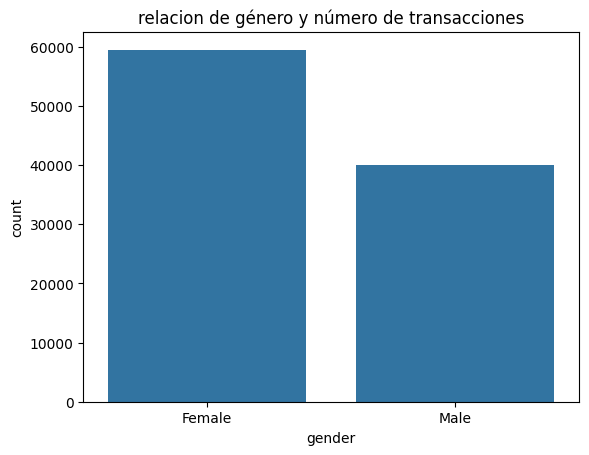

In [50]:
# Histograma: cantidad de hombres y mujeres
sns.countplot(data=df1, x='gender').set(title='Relacion de género y número de transacciones');

In [54]:
# .value_counts() cantidad de elementos por categoria
gender_quantity = df1['gender'].value_counts()
gender_quantity



gender
Female    59482
Male      39975
Name: count, dtype: int64

In [58]:
# resetear el indice y trabajar con un df
df_gender = df1['gender'].value_counts().reset_index()
df_gender.shape

(2, 2)

In [59]:
df_gender

,gender,count
0,Female,59482
1,Male,39975


Text(0.5, 1.0, 'Relacion de transacciones entre mujeres y hombres')

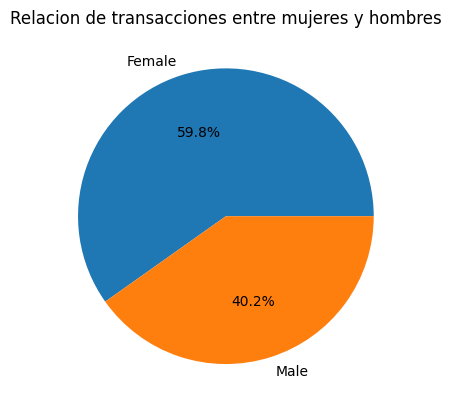

In [17]:
plt.pie(gender_quantity, labels=gender_quantity.index, autopct='%1.1f%%')
plt.title('Relacion de transacciones entre mujeres y hombres')

##### 2. Distribución de edades por número de transacciones

In [60]:
df2 = df1_2.copy()

In [61]:
df2.head(2)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul


In [62]:
df2['age'].describe()

count    99457.000000
mean        43.427089
std         14.990054
min         18.000000
25%         30.000000
50%         43.000000
75%         56.000000
max         69.000000
Name: age, dtype: float64

In [73]:
# nueva columna para categorias de edades
df2['age_cat'] = df2['age']

In [74]:
# categoria de edades
# funcion para definir cateorias de edad
# gen z: 18-25, milenials 25-34, gen x 35-49, gen boomers 50-64,
#  Gen S 65 en adelante
def category_f(age):
    if (age >= 18) and (age < 25):
        return '18-24' 
    elif (age >= 25) and (age < 35):
        return '25-34'
    elif (age >= 35) and (age < 50):
        return '35-49'
    elif (age >= 50) and (age < 65 ):
        return '50-64'
    else:
        return '65-'

In [75]:
# aplicamos la funcion
df2['age_cat'] = df2['age_cat'].apply(category_f)

In [76]:
# confirmamos que la funcion hace el trabajo
df2[['age', 'age_cat']].tail(5)

,age,age_cat
99452,45,35-49
99453,27,25-34
99454,63,50-64
99455,56,50-64
99456,36,35-49


[Text(0.5, 1.0, 'Edades por trasaccion')]

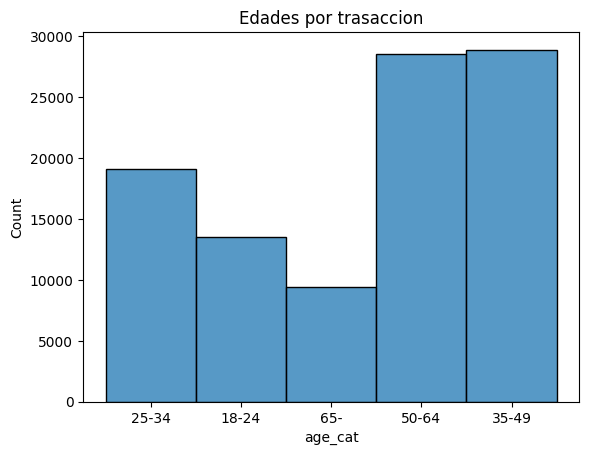

In [77]:
# histograma
sns.histplot(data=df2, x='age_cat').set(title='Edades por trasaccion')

In [78]:
df2.head(3)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24


##### ¿Qué grupo de edad gastó más dinero?

In [79]:
# nueva
df3 = df2.copy()

In [80]:
df3['total'] = df3['quantity'] * df3['price']

In [81]:
df3[['total', 'quantity', 'price']].tail(3)

,total,quantity,price
99454,20.92,2,10.46
99455,16800.00,4,4200.00
99456,105.57,3,35.19


In [87]:
df_age_total = df3.groupby('age_cat')['total'].sum()
#df_age_total.dtype
df_age_total

age_cat
18-24    33454083.87
25-34    47805115.52
35-49    74358776.99
50-64    71961241.44
65-      23926576.43
Name: total, dtype: float64

In [88]:
type(df_age_total)

pandas.core.series.Series

In [116]:
# modificar el tipo de dato a un df
df_age_total2 = df3.groupby('age_cat')['total'].sum().sort_values(ascending=False).reset_index()
df_age_total2.head()

,age_cat,total
0,35-49,74358776.99
1,50-64,71961241.44
2,25-34,47805115.52
3,18-24,33454083.87
4,65-,23926576.43


In [105]:
1e6

1000000.0

In [117]:
df_age_total2['total'] = round(df_age_total2['total'] / 1e6 , 2)

In [119]:
df_age_total2.head()

,age_cat,total
0,35-49,74.36
1,50-64,71.96
2,25-34,47.81
3,18-24,33.45
4,65-,23.93


In [120]:
#df_age_total2.plot();

In [111]:
df_age_total2.head()

,age_cat,total
0,35-49,74.36
1,50-64,71.96
2,25-34,47.81
3,18-24,33.45
4,65-,23.93


C:\Users\ThecnomacLecheria\AppData\Local\Temp\ipykernel_10692\1757810400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_total2, x='age_cat', y='total', palette='Paired').set(title='Dinero gastado en millones de $ por edad');


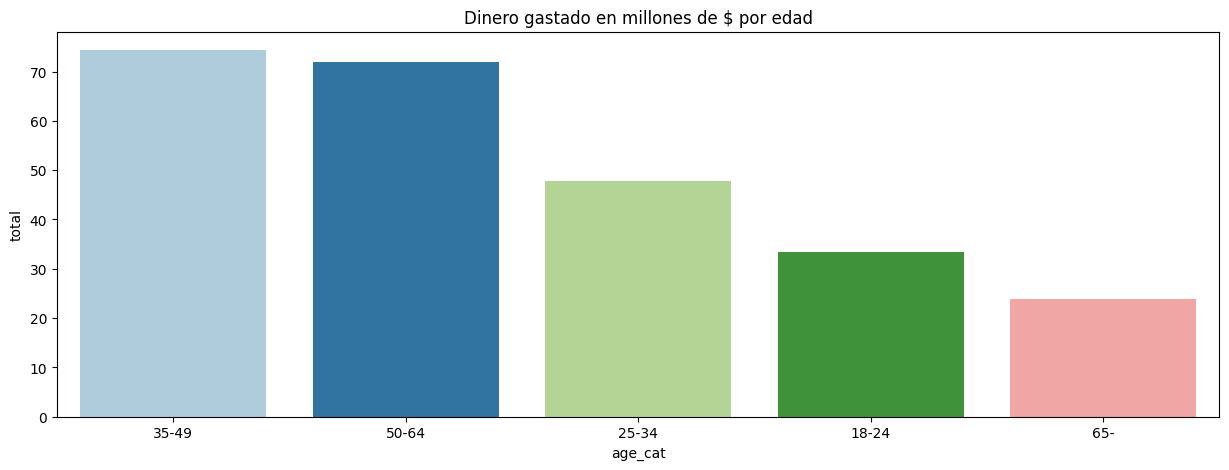

In [115]:
# grafica por categoria de edad
plt.figure(figsize=(15,5))
sns.barplot(data=df_age_total2, x='age_cat', y='total', palette='Paired').set(title='Dinero gastado en millones de $ por edad');

In [33]:
#sns.histplot(data=df_age_total, x='age_cat').set(title='Gasto por edades')

In [98]:
# set index by total
df_age_total_i = df_age_total2.set_index('total')

In [101]:
df_age_total_i.head()

,age_cat
total,
33454083.87,18-24
47805115.52,25-34
74358776.99,35-49
71961241.44,50-64
23926576.43,65-


#### - .4 Comprobar la distribución por edades entre hombres y mujeres

In [138]:
df4 = df3.copy()

In [136]:
#df4['total'] = round( df4['total']/1e3, 2 )

In [139]:
df4.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,year,month,shopping_mall,age_cat,total
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,2022,8,Kanyon,25-34,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,2021,12,Forum Istanbul,18-24,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,2021,11,Metrocity,18-24,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,2021,5,Metropol AVM,65-,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,2021,10,Kanyon,50-64,242.40


In [140]:
# Cantidad de transacciones por genero y categoria de edad
df_age_gender_quantity = df4.groupby(['gender', 'age_cat']).size().sort_values(ascending=False).reset_index(name='cantidad')
df_age_gender_quantity

,gender,age_cat,cantidad
0,Female,35-49,17355
1,Female,50-64,17080
2,Male,35-49,11551
3,Female,25-34,11474
4,Male,50-64,11467
5,Female,18-24,7938
6,Male,25-34,7607
7,Female,65-,5635
8,Male,18-24,5558
9,Male,65-,3792


In [143]:
# Total gastado por genero y categoria 
df_age_gender_total = df4.groupby(['gender', 'age_cat'])['total'].sum().sort_values(ascending=False).reset_index()
df_age_gender_total.head(10)

,gender,age_cat,total
0,Female,35-49,44244395.29
1,Female,50-64,43144077.33
2,Male,35-49,30114381.70
3,Male,50-64,28817164.11
4,Female,25-34,28532699.19
5,Female,18-24,20285122.34
6,Male,25-34,19272416.33
7,Female,65-,14000841.87
8,Male,18-24,13168961.53
9,Male,65-,9925734.56


In [144]:
df_age_gender_total_f =  df_age_gender_total[ df_age_gender_total['gender'] == 'Female']
df_age_gender_total_f

,gender,age_cat,total
0,Female,35-49,44244395.29
1,Female,50-64,43144077.33
4,Female,25-34,28532699.19
5,Female,18-24,20285122.34
7,Female,65-,14000841.87


In [145]:
df_age_gender_total_f['total'] = round( df_age_gender_total_f['total'] /1e6, 2 )
df_age_gender_total_f

C:\Users\ThecnomacLecheria\AppData\Local\Temp\ipykernel_10692\3511043934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_gender_total_f['total'] = round( df_age_gender_total_f['total'] /1e6, 2 )


,gender,age_cat,total
0,Female,35-49,44.24
1,Female,50-64,43.14
4,Female,25-34,28.53
5,Female,18-24,20.29
7,Female,65-,14.00


C:\Users\ThecnomacLecheria\AppData\Local\Temp\ipykernel_10692\1774617841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_age_gender_total_f, x='age_cat', y='total', palette='Paired').set(title='Grafica de dinero gasto por categoria de edad, en el genero femenino')


[Text(0.5, 1.0, 'Grafica de dinero gasto por categoria de edad, en el genero femenino')]

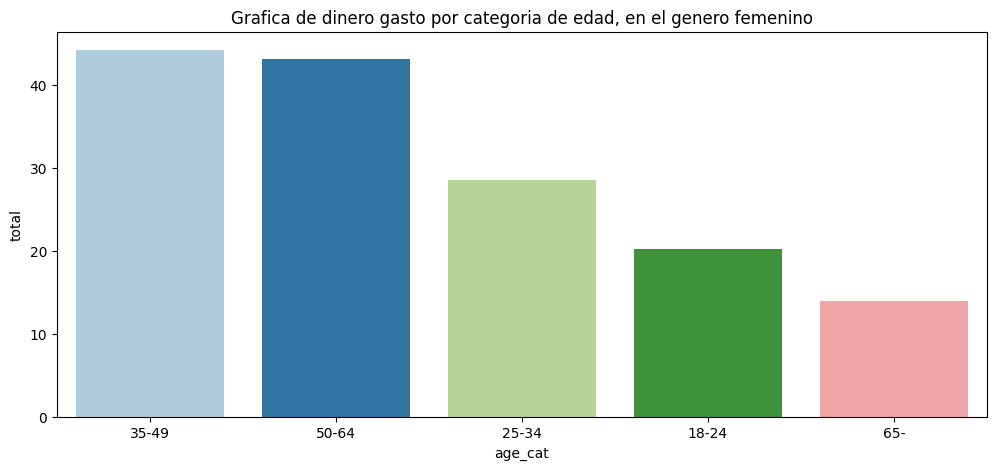

In [146]:
# Grafica de dinero gasto por categoria de edad, en el genero femenino
plt.figure(figsize=(12,5))
sns.barplot(data=df_age_gender_total_f, x='age_cat', y='total', palette='Paired').set(title='Grafica de dinero gasto por categoria de edad, en el genero femenino')